In [1]:
import numpy as np
from scipy import optimize
import scipy.special as special
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from matplotlib import cm

In [13]:
# N-dimensional Airy disk function
# negative so that it has a large minimum at the origin

# need this explicit form just for plotting
def negAiry2D(x, y):
    
    q = np.sqrt(x**2 + y**2)
    
    fx = -(2 * special.j1(q)/q)**2
    
    return fx

# this is what we'll use for optimization
def negAiryND(x):
    
    q = np.sqrt(np.sum(x**2))
    
    fx = -(2 * special.j1(q)/q)**2
    
    return fx

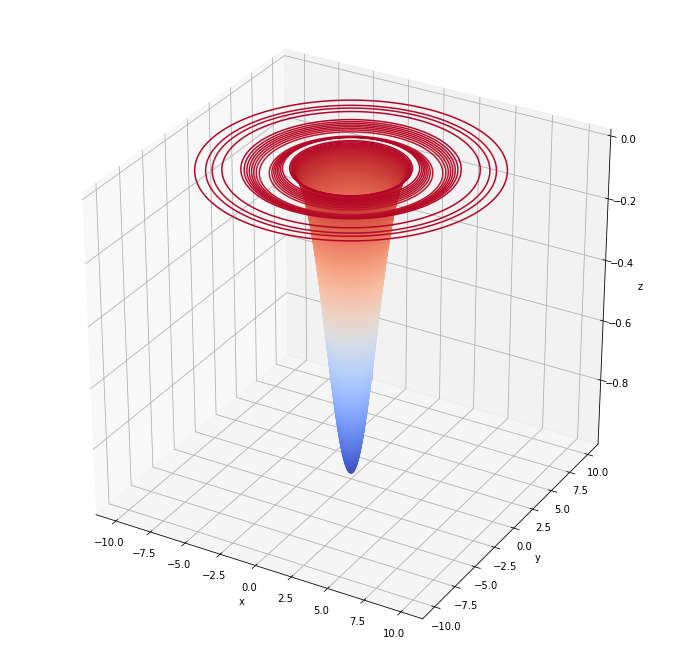

In [38]:
# consider 2 dimensions

D = 2

# plotting the disk

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)

X, Y = np.meshgrid(x, y)
Z = negAiry2D(X, Y)



fig = plt.figure(figsize=[12, 12])
ax = plt.axes(projection='3d')

surf = ax.contour3D(X, Y, Z, 500, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

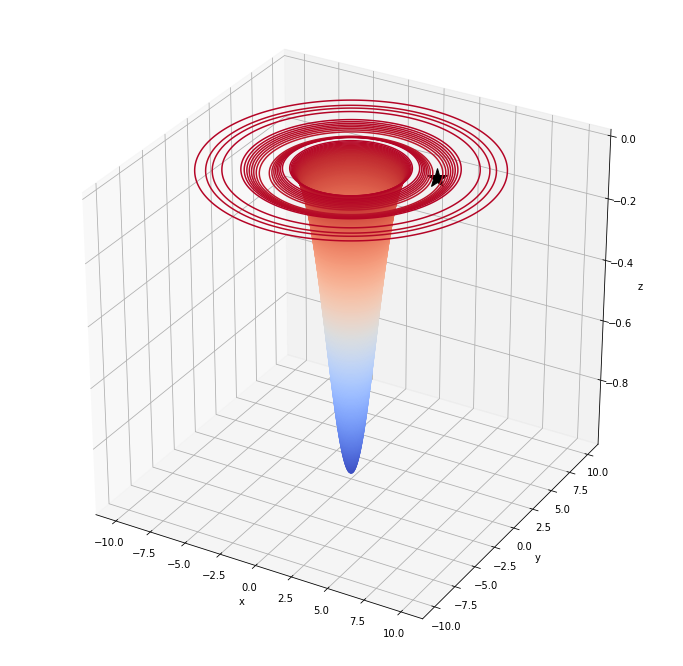

In [48]:
# choosing a random starting point
# explicitly away from the origin
# run multiple times to see convergence on local minima!
x0 = np.random.normal(3, 2, size=D)

result = optimize.minimize(negAiryND, x0)

min_pos = result.x

min_val = result.fun

# plotting the disk, now with the added point

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)

X, Y = np.meshgrid(x, y)
Z = negAiry2D(X, Y)



fig = plt.figure(figsize=[12, 12])
ax = plt.axes(projection='3d')

surf = ax.contour3D(X, Y, Z, 500, cmap=cm.coolwarm)

ax.plot3D([min_pos[0]], [min_pos[1]], [min_val], 'k*', markersize=20)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()